Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.


| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Define the columns you want to import
selected_columns = [
    "inter_dom",
    "japanese_cate",
    "english_cate",
    "academic",
    "age",
    "stay",
    "todep",
    "tosc",
    "toas"
]

# Load only the selected columns
st = pd.read_csv("C:/Users/HP/downloads/students.csv", usecols=selected_columns)

# Display the first few rows
print(st.head())


  inter_dom academic   age  stay japanese_cate english_cate  todep  tosc  toas
0     Inter     Grad  24.0   5.0       Average         High    0.0  34.0  91.0
1     Inter     Grad  28.0   1.0          High         High    2.0  48.0  39.0
2     Inter     Grad  25.0   6.0          High         High    2.0  41.0  51.0
3     Inter     Grad  29.0   1.0           Low      Average    3.0  37.0  75.0
4     Inter     Grad  28.0   1.0           Low      Average    3.0  37.0  82.0


In [4]:
# Step 1: Filter international students
intl_students = st[st["inter_dom"] == "Inter"]
print(intl_students.head())

# Step 2–3: Group and aggregate
summary = intl_students.groupby("stay").agg(
    count_int=("inter_dom", "count"),
    average_phq=("todep", "mean"),
    average_scs=("tosc", "mean"),
    average_as=("toas", "mean")
)

# Step 4: Round averages
summary = summary.round(2)

# Step 5: Sort by stay descending
summary = summary.sort_index(ascending=False)

# Step 6: Reset index and rename DataFrame
df = summary.reset_index()

# Display the result
print(df)


  inter_dom academic   age  stay japanese_cate english_cate  todep  tosc  toas
0     Inter     Grad  24.0   5.0       Average         High    0.0  34.0  91.0
1     Inter     Grad  28.0   1.0          High         High    2.0  48.0  39.0
2     Inter     Grad  25.0   6.0          High         High    2.0  41.0  51.0
3     Inter     Grad  29.0   1.0           Low      Average    3.0  37.0  75.0
4     Inter     Grad  28.0   1.0           Low      Average    3.0  37.0  82.0
   stay  count_int  average_phq  average_scs  average_as
0  10.0          1        13.00        32.00       50.00
1   8.0          1        10.00        44.00       65.00
2   7.0          1         4.00        48.00       45.00
3   6.0          3         6.00        38.00       58.67
4   5.0          1         0.00        34.00       91.00
5   4.0         14         8.57        33.93       87.71
6   3.0         46         9.09        37.13       78.00
7   2.0         39         8.28        37.08       77.67
8   1.0      

average_phq: average depression score (todep)

average_scs: average social connectedness score (tosc)

average_as: average acculturative stress score (toas)

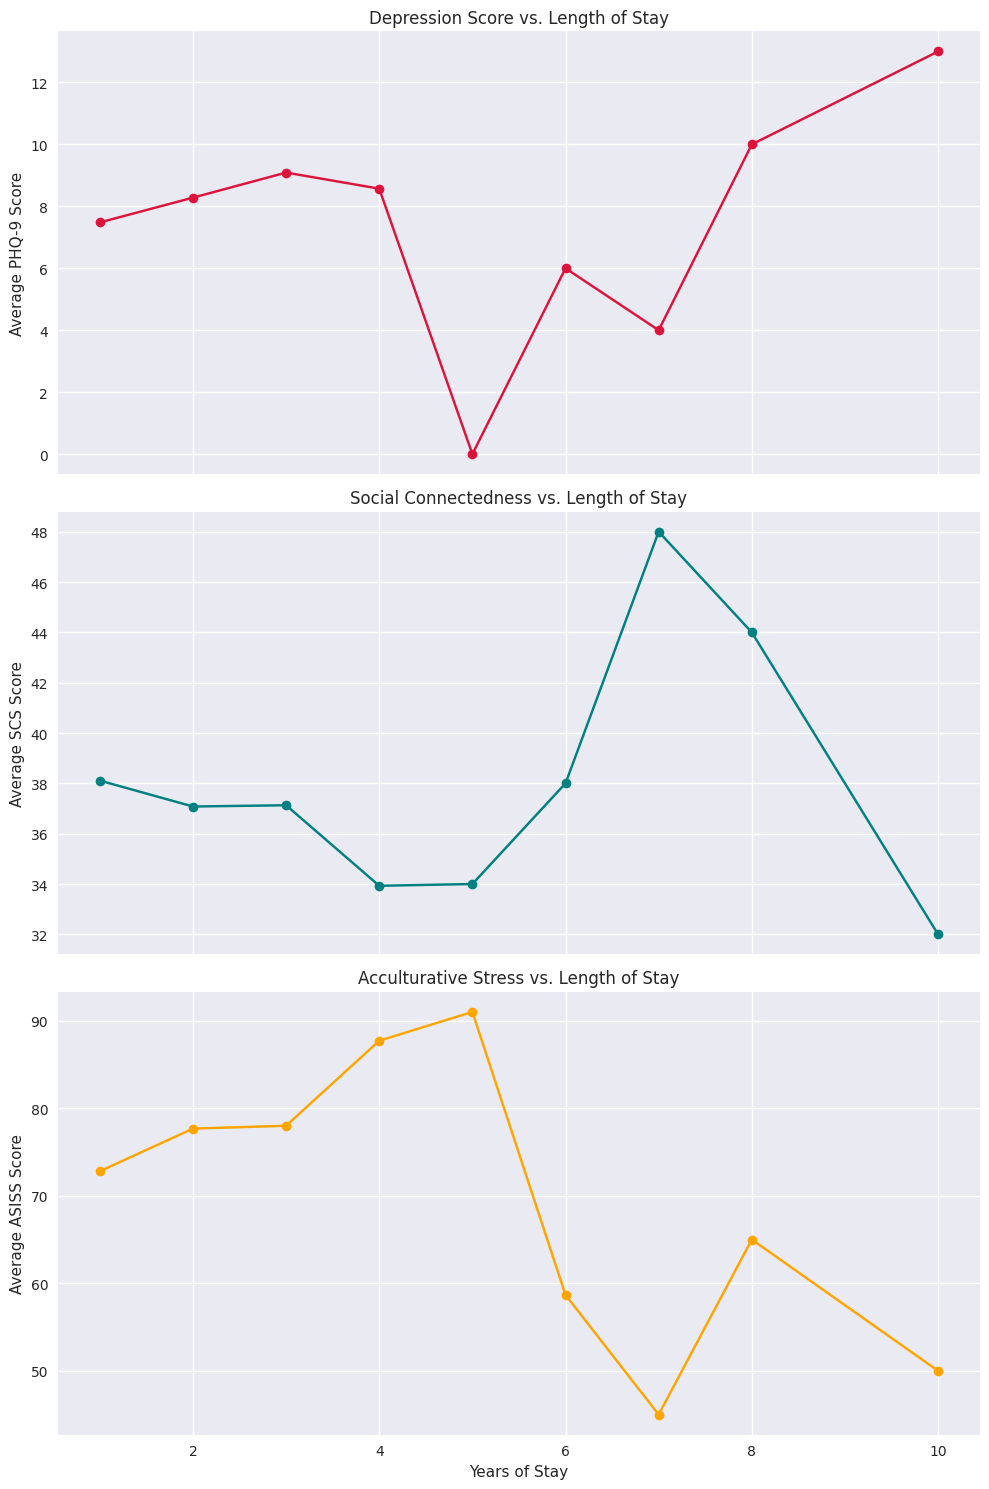

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress glyph warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set a font that supports most Unicode characters
plt.rcParams["font.family"] = "DejaVu Sans"

# Load dataset
selected_columns = [
    "inter_dom", "japanese_cate", "english_cate", "academic",
    "age", "stay", "todep", "tosc", "toas"
]
st = pd.read_csv("dataset/students.csv", usecols=selected_columns)

# Filter international students
intl_students = st[st["inter_dom"] == "Inter"]

# Group and aggregate
summary = intl_students.groupby("stay").agg(
    count_int=("inter_dom", "count"),
    average_phq=("todep", "mean"),
    average_scs=("tosc", "mean"),
    average_as=("toas", "mean")
).round(2).sort_index(ascending=False).reset_index()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
plt.style.use("seaborn-v0_8")

# Chart 1: Depression
axs[0].plot(summary["stay"], summary["average_phq"], marker="o", color="crimson")
axs[0].set_title("Depression Score vs. Length of Stay")
axs[0].set_ylabel("Average PHQ-9 Score")
axs[0].grid(True)

# Chart 2: Social Connectedness
axs[1].plot(summary["stay"], summary["average_scs"], marker="o", color="teal")
axs[1].set_title("Social Connectedness vs. Length of Stay")
axs[1].set_ylabel("Average SCS Score")
axs[1].grid(True)

# Chart 3: Acculturative Stress
axs[2].plot(summary["stay"], summary["average_as"], marker="o", color="orange")
axs[2].set_title("Acculturative Stress vs. Length of Stay")
axs[2].set_xlabel("Years of Stay")
axs[2].set_ylabel("Average ASISS Score")
axs[2].grid(True)

# Final layout
plt.tight_layout()
plt.show()
